# Solar Power Forecasting Using Vector Auto Regression

1. Read labeled data from output.xlsx
2. Set forecast_days
3. Generate probabilistic labels
4. Run VAR

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
import datetime

In [4]:
forecast_days = 7

In [5]:
xls = pd.ExcelFile("output.xlsx")

In [6]:
years = ["2012","2013","2014","2015","2016","2017","2018","2019","2020"]

In [7]:
df_obj = dict()
for i in years:
    df_obj[i] = pd.read_excel(xls, i)
    df_obj[i] = df_obj[i].drop(["Unnamed: 0"],axis=True)

## Forecasting start

In [8]:
df = df_obj['2012']
# df = df.append(df_obj['2016'])
for i in range(2013,2019):
    df = df.append(df_obj[str(i)])
    
df1 = df.drop(["1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", 
                    "Aggregate Meter Reading (KWH)", 
                    "Difference", "SEEDs data (KWH)", "Insolation", 
                    "PR (%)", "Any Issues/Problems Observed", "WO#", "NO-OFF-CLEAN MODULES"], axis=1)

In [9]:
df1

,Date,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,2012-07-06,3218.00,1,0,0,0,0,0,0,0,0,0,0,0
1,2012-07-07,3633.00,1,0,0,0,0,0,0,0,0,0,0,0
2,2012-07-08,4377.00,0,1,0,0,0,0,0,0,0,0,0,0
3,2012-07-09,4625.00,0,1,0,0,0,0,0,0,0,0,0,0
4,2012-07-10,648.00,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,4129.29,1,0,1,0,0,0,0,0,0,0,0,0
361,2018-12-28,4266.50,0,0,1,0,0,0,0,0,0,0,0,0
362,2018-12-29,3732.03,1,0,1,0,0,0,0,0,0,0,0,0
363,2018-12-30,4063.88,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [11]:
df1 = df1.set_index('Date')

In [12]:
for i in df1.columns[1:]:
    print(i)
    temp = df1[i].value_counts().to_dict()
    print(temp)
    if 1.0 in temp.keys():
        df1[str(i)][df1[str(i)] == 1.0] = (temp[1.0]/100)**12

Grid Failure
{0: 1512, 1: 858}
Inverter
{0: 2127, 1: 243}
Module Cleaning
{0: 1573, 1: 797}
Rainy day
{0: 2326, 1: 44}
No Module Cleaning
{0: 2284, 1: 86}
Transformer replacement and maintenance
{0: 2351, 1: 19}
Cable and Fuse maintenance
{0: 2304, 1: 66}
Plant Shutdown
{0: 2369, 1: 1}
Internet
{0: 2310, 1: 60}
Battery
{0: 2343, 1: 27}
Cloudy
{0: 1969, 1: 401}
Module Cleaning by rains
{0: 2370}


/var/folders/4r/3pd1tn_x59n48w85hg2nw0zm0000gn/T/ipykernel_27311/3028890833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[str(i)][df1[str(i)] == 1.0] = (temp[1.0]/100)**12
/var/folders/4r/3pd1tn_x59n48w85hg2nw0zm0000gn/T/ipykernel_27311/3028890833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[str(i)][df1[str(i)] == 1.0] = (temp[1.0]/100)**12
/var/folders/4r/3pd1tn_x59n48w85hg2nw0zm0000gn/T/ipykernel_27311/3028890833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [13]:
df1.head()

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
Date,,,,,,,,,,,,,
2012-07-06,3218.0,1.591650e+11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-07-07,3633.0,1.591650e+11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-07-08,4377.0,0.000000e+00,42391.158275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-07-09,4625.0,0.000000e+00,42391.158275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2012-07-10,648.0,0.000000e+00,42391.158275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
df1['Total Generation (KWH)'] = pd.to_numeric(df1['Total Generation (KWH)'])
df1['Total Generation (KWH)'].dtype

dtype('float64')

In [15]:
corr_df = df1.corr()
# corr_df[corr_df < 0] = 0
corr_df

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
Total Generation (KWH),1.000000,-0.130600,-0.314601,0.128121,-0.243720,-0.005216,-0.050500,0.032419,0.014604,0.058770,-0.042502,-0.430203,NaN
Grid Failure,-0.130600,1.000000,0.057966,0.028741,0.006965,-0.071054,-0.008649,-0.004769,0.027274,0.007146,-0.006409,-0.026162,NaN
Inverter,-0.314601,0.057966,1.000000,-0.240594,0.345086,-0.065587,0.047602,-0.057207,-0.006944,-0.045619,0.107890,0.170230,NaN
Module Cleaning,0.128121,0.028741,-0.240594,1.000000,-0.097901,-0.138123,0.046175,0.036938,0.028864,-0.103348,-0.076412,-0.206888,NaN
Rainy day,-0.243720,0.006965,0.345086,-0.097901,1.000000,-0.026688,0.022688,-0.004281,-0.002826,-0.022166,-0.014764,0.304770,NaN
No Module Cleaning,-0.005216,-0.071054,-0.065587,-0.138123,-0.026688,1.000000,-0.017444,0.008297,-0.003987,-0.031273,-0.020830,0.032792,NaN
Transformer replacement and maintenance,-0.050500,-0.008649,0.047602,0.046175,0.022688,-0.017444,1.000000,-0.015215,-0.001847,-0.014488,-0.009650,-0.027950,NaN
Cable and Fuse maintenance,0.032419,-0.004769,-0.057207,0.036938,-0.004281,0.008297,-0.015215,1.000000,-0.003477,-0.027277,0.054323,-0.014822,NaN
Plant Shutdown,0.014604,0.027274,-0.006944,0.028864,-0.002826,-0.003987,-0.001847,-0.003477,1.000000,-0.003311,-0.002206,-0.009272,NaN
Internet,0.058770,0.007146,-0.045619,-0.103348,-0.022166,-0.031273,-0.014488,-0.027277,-0.003311,1.000000,0.008010,-0.072731,NaN


In [16]:
# total_0 = 0
# total_1 = 0
# for i in df1.columns[1:]:
#     value_c = df1[i].value_counts()
#     print(df1[i].value_counts())
#     total_0 += value_c[]

In [17]:
df1 = df1.drop(["Cable and Fuse maintenance","No Module Cleaning","Rainy day","Transformer replacement and maintenance","Plant Shutdown","Internet","Battery","Module Cleaning by rains"], axis=1)
df1

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Cloudy
Date,,,,,
2012-07-06,3218.00,1.591650e+11,0.000000,0.000000e+00,0.0
2012-07-07,3633.00,1.591650e+11,0.000000,0.000000e+00,0.0
2012-07-08,4377.00,0.000000e+00,42391.158275,0.000000e+00,0.0
2012-07-09,4625.00,0.000000e+00,42391.158275,0.000000e+00,0.0
2012-07-10,648.00,0.000000e+00,42391.158275,0.000000e+00,0.0
...,...,...,...,...,...
2018-12-27,4129.29,1.591650e+11,0.000000,6.569009e+10,0.0
2018-12-28,4266.50,0.000000e+00,0.000000,6.569009e+10,0.0
2018-12-29,3732.03,1.591650e+11,0.000000,6.569009e+10,0.0


In [18]:
def model_function(df1):

    print(df1.tail(8))
    endog_array = df1.to_numpy(dtype=int)
    var_model = VAR(endog_array)

#     print(var_model.select_order(48).summary())

    results = var_model.fit(15, trend='c', ic='aic')
#     print(results.summary())

    lag = results.k_ar
    forecast_results = results.forecast(df1.values[-lag:],steps=forecast_days)
    
    return forecast_results

In [19]:
columns = list(df1.columns)

In [20]:
columns

['Total Generation (KWH)',
 'Grid Failure',
 'Inverter',
 'Module Cleaning',
 'Cloudy']

In [21]:
final_train_df = df1.copy()

In [22]:
date_list = pd.date_range(start="2019-01-01",end="2020-01-30")

In [23]:
date_list = pd.to_datetime(date_list)

In [24]:
date_list

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30'],
              dtype='datetime64[ns]', length=395, freq='D')

In [25]:
final_train_df

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Cloudy
Date,,,,,
2012-07-06,3218.00,1.591650e+11,0.000000,0.000000e+00,0.0
2012-07-07,3633.00,1.591650e+11,0.000000,0.000000e+00,0.0
2012-07-08,4377.00,0.000000e+00,42391.158275,0.000000e+00,0.0
2012-07-09,4625.00,0.000000e+00,42391.158275,0.000000e+00,0.0
2012-07-10,648.00,0.000000e+00,42391.158275,0.000000e+00,0.0
...,...,...,...,...,...
2018-12-27,4129.29,1.591650e+11,0.000000,6.569009e+10,0.0
2018-12-28,4266.50,0.000000e+00,0.000000,6.569009e+10,0.0
2018-12-29,3732.03,1.591650e+11,0.000000,6.569009e+10,0.0


In [26]:
date_list[7*0:7*(0+1)]

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07'],
              dtype='datetime64[ns]', freq='D')

In [27]:
final_result_df = pd.DataFrame()
final_train_df = df1.copy()
# for loop for updating results in for loop
# append the result dictionary to training dictionary
# try to predict n times for 7 days to remove linear result
# as we are expecting that our former prediction is near to perfect to create offset
for i in range(4):
    print("Times run:",i+1)
    temp_result = model_function(final_train_df)
    temp_result = pd.DataFrame(temp_result, columns=columns)
    final_result_df = final_result_df.append(temp_result, ignore_index=True)
    temp_result['Date'] = date_list[7*i:7*(i+1)]
    temp_result = temp_result.set_index('Date')
    final_train_df = final_train_df.append(temp_result)
#     print(final_train_df.tail(8))

Times run: 1
            Total Generation (KWH)  Grid Failure      Inverter  \
Date                                                             
2018-12-24                 2923.51  1.591650e+11      0.000000   
2018-12-25                 3970.89  0.000000e+00      0.000000   
2018-12-26                 4012.14  0.000000e+00      0.000000   
2018-12-27                 4129.29  1.591650e+11      0.000000   
2018-12-28                 4266.50  0.000000e+00      0.000000   
2018-12-29                 3732.03  1.591650e+11      0.000000   
2018-12-30                 4063.88  0.000000e+00  42391.158275   
2018-12-31                 4093.90  1.591650e+11      0.000000   

            Module Cleaning  Cloudy  
Date                                 
2018-12-24     6.569009e+10     0.0  
2018-12-25     6.569009e+10     0.0  
2018-12-26     6.569009e+10     0.0  
2018-12-27     6.569009e+10     0.0  
2018-12-28     6.569009e+10     0.0  
2018-12-29     6.569009e+10     0.0  
2018-12-30     0.00000

In [28]:
final_result_df['Date'] = date_list[:28]
final_result_df = final_result_df.set_index('Date')

In [29]:
final_result_df

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Cloudy
Date,,,,,
2019-01-01,4006.415795,7.759326e+10,5683.410984,6.037081e+10,2.306168e+05
2019-01-02,4018.499109,6.715480e+10,3163.837454,6.166103e+10,-3.550643e+05
2019-01-03,4176.961071,6.545419e+10,4804.110261,6.070473e+10,-1.041128e+05
2019-01-04,4119.504024,5.935420e+10,4443.525229,5.803120e+10,-2.813087e+04
2019-01-05,3921.924388,8.885053e+10,3362.763153,6.195651e+10,1.093684e+05
2019-01-06,3916.175282,6.273029e+10,12704.775919,1.770407e+10,4.742693e+05
2019-01-07,3903.286893,8.737411e+10,2705.088181,6.479200e+10,5.890238e+05
2019-01-08,3875.558453,7.268312e+10,6163.541503,5.412861e+10,1.282644e+06
2019-01-09,4044.455511,5.397992e+10,5437.155657,5.491604e+10,5.805815e+05


In [30]:
# df_obj['2019'] = df_obj['2019'].set_index('Date')

In [31]:
df_obj['2019']['Total Generation (KWH)'][0:28]

0     3812.94
1     3920.74
2     4113.45
3     3873.59
4     3603.61
5     4401.37
6     3852.56
7     3913.55
8     3731.08
9     4058.75
10    4077.43
11    3923.99
12    3544.94
13    3184.01
14    3738.13
15    4121.14
16    4013.75
17    4207.29
18    4375.61
19    3834.01
20    3557.79
21    3701.02
22    3823.90
23    4342.60
24    4370.45
25    4540.54
26    4629.45
27    4412.47
Name: Total Generation (KWH), dtype: float64

0     3812.94
1     3920.74
2     4113.45
3     3873.59
4     3603.61
5     4401.37
6     3852.56
7     3913.55
8     3731.08
9     4058.75
10    4077.43
11    3923.99
12    3544.94
13    3184.01
14    3738.13
15    4121.14
16    4013.75
17    4207.29
18    4375.61
19    3834.01
20    3557.79
21    3701.02
22    3823.90
23    4342.60
24    4370.45
25    4540.54
26    4629.45
27    4412.47
Name: Total Generation (KWH), dtype: float64

In [38]:
graph_df = pd.DataFrame()
graph_df['Prediction'] = final_result_df['Total Generation (KWH)']
graph_df['Original'] = df_obj['2019']['Total Generation (KWH)'][:28]

In [42]:
graph_df['Original1'] = df_obj['2019']['Total Generation (KWH)'][:28]

In [43]:
graph_df

,Prediction,Original,Original1
Date,,,
2019-01-01,4006.415795,NaN,NaN
2019-01-02,4018.499109,NaN,NaN
2019-01-03,4176.961071,NaN,NaN
2019-01-04,4119.504024,NaN,NaN
2019-01-05,3921.924388,NaN,NaN
2019-01-06,3916.175282,NaN,NaN
2019-01-07,3903.286893,NaN,NaN
2019-01-08,3875.558453,NaN,NaN
2019-01-09,4044.455511,NaN,NaN


<AxesSubplot:xlabel='Date'>

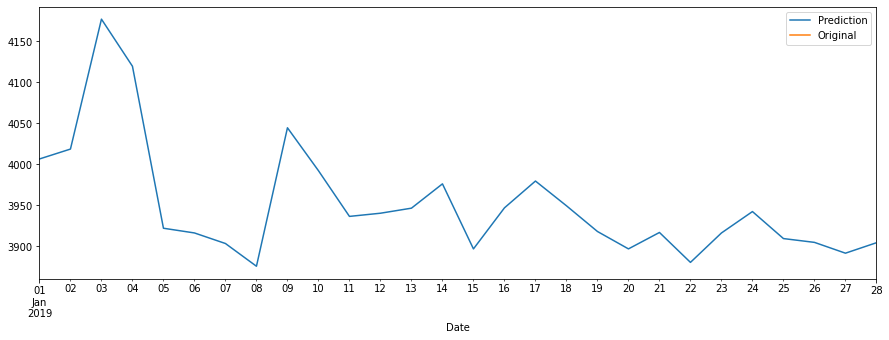

In [34]:
graph_df.plot(figsize=(15,5))

## Results

In [44]:
forecast_power = []
grid_pred = []
inverter_pred = []
module_pred = []
cloudy_pred = []
for i in forecast_results:
    forecast_power.append(i[0])
    grid_pred.append(i[1])
    inverter_pred.append(i[2])
    module_pred.append(i[3])
    cloudy_pred.append(i[4])

NameError: name 'forecast_results' is not defined

In [1]:
power_16 = df_obj['2019']['Total Generation (KWH)']
diff_power = pd.DataFrame({"Prediction":forecast_power[:forecast_days],"Original":power_16[:forecast_days],
                           "Grid_pred":grid_pred[:forecast_days],
                          "Module_pred":module_pred[:forecast_days],"Cloudy_pred":cloudy_pred[:forecast_days],
                          "Inverter_pred":inverter_pred[:forecast_days]})
diff_power['Difference'] = diff_power['Prediction'] - diff_power['Original']
diff_power

NameError: name 'df_obj' is not defined

## Plot results

<AxesSubplot:>

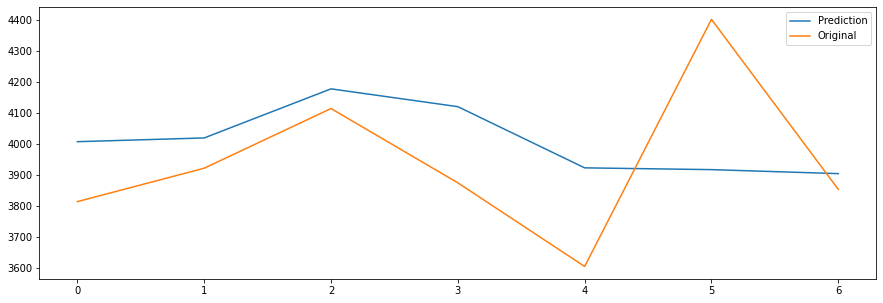

In [25]:
diff_power.plot(y=['Prediction','Original'],figsize=(15,5))

In [26]:
mean_squared_error(power_16[:forecast_days],forecast_power)**(1/2)

253.77387886382024

In [27]:
mean_absolute_error(power_16[:forecast_days],forecast_power)

207.84228523195972